# Final Project
## Authors:
- Taylor Tucker
- Virginia Weston
- Tina Jin
- Jeffrey Bradley

## Code for linear regression modeling.

Import Statements

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

Importing the continuous dataset

In [2]:
df = pd.read_csv("./cleaned_data.csv")

In [3]:
df

,Unnamed: 0,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,...,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted,Total Price
0,0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,...,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0,55625.0
1,1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,...,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0,59470.0
2,2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,...,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0,60636.0
3,3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,...,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0,63180.0
4,4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,...,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0,23170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,233,71.0,100.0,9682.0,52.0,479,43.0,67.0,28.0,6.0,...,38.0,30.0,117.0,33.0,8.0,11.0,39,61,56.0,29630.0
221,234,511.0,63.0,55897.0,99.0,2095,48.0,12.0,78.0,9.0,...,95.0,86.0,1133.0,342.0,44.0,83.0,28,56,13.0,73200.0
222,235,363.0,100.0,29504.0,70.0,1757,55.0,79.0,21.0,1.0,...,62.0,61.0,373.0,142.0,13.0,17.0,49,22,74.0,53056.0
223,236,379.0,98.0,31824.0,88.0,1666,53.0,55.0,42.0,3.0,...,81.0,77.0,440.0,152.0,23.0,34.0,14,60,64.0,60363.0


Dropping weird column

In [4]:
df.drop(["Unnamed: 0"], inplace=True, axis=1)

Splitting the data into x and y

In [5]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
x

,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,Percent Unknown,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted
0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,0.0,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0
1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,0.0,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0
2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,0.0,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0
3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,0.0,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0
4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,2.0,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,71.0,100.0,9682.0,52.0,479,43.0,67.0,28.0,6.0,0.0,38.0,30.0,117.0,33.0,8.0,11.0,39,61,56.0
221,511.0,63.0,55897.0,99.0,2095,48.0,12.0,78.0,9.0,0.0,95.0,86.0,1133.0,342.0,44.0,83.0,28,56,13.0
222,363.0,100.0,29504.0,70.0,1757,55.0,79.0,21.0,1.0,0.0,62.0,61.0,373.0,142.0,13.0,17.0,49,22,74.0
223,379.0,98.0,31824.0,88.0,1666,53.0,55.0,42.0,3.0,0.0,81.0,77.0,440.0,152.0,23.0,34.0,14,60,64.0


In [7]:
y

0      55625.0
1      59470.0
2      60636.0
3      63180.0
4      23170.0
        ...   
220    29630.0
221    73200.0
222    53056.0
223    60363.0
224    43389.0
Name: Total Price, Length: 225, dtype: float64

Train test split 70-30

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, shuffle=True, test_size=0.3)

Creating the linear regression pipeline

In [9]:
pl_lr = make_pipeline(StandardScaler(), MinMaxScaler(), LinearRegression(normalize=True), verbose=True)

Fitting the pipeline to the training data

In [10]:
pl.fit(x_train, y_train)

[Pipeline] .... (step 1 of 3) Processing standardscaler, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing minmaxscaler, total=   0.0s
[Pipeline] .. (step 3 of 3) Processing linearregression, total=   0.0s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression(normalize=True))],
         verbose=True)

Scoring the pipeline, which will show the R^2 value from the Linear Regression model

In [11]:
print("Model Score (whole dataset):", pl.score(x_test, y_test))

Model Score (whole dataset): 0.8412536638771098


We can see above that using the whole dataset for a simple linear regression using L2 regularization and the two scalers mentioned in the README, we can
achieve an an R^2 of 85.5%. However, I want to use only the most 1 or 2 linearly correlated features we can see from
the correlation heatmap in the figs directory. These features are ["Average Amount of Aid", "Graduation Rate"]


Redefining x and y from a fresh copy of the continuous dataset

In [12]:
df = pd.read_csv("./cleaned_data.csv")
df.drop(["Unnamed: 0"], inplace=True, axis=1)
x = df[["Average Amount of Aid", "Graduation Rate"]]
y = df.iloc[:, -1]

In [13]:
x

,Average Amount of Aid,Graduation Rate
0,32400.0,69.0
1,40855.0,64.0
2,39796.0,51.0
3,38689.0,74.0
4,10055.0,31.0
...,...,...
220,9682.0,38.0
221,55897.0,95.0
222,29504.0,62.0
223,31824.0,81.0


In [14]:
y

0      55625.0
1      59470.0
2      60636.0
3      63180.0
4      23170.0
        ...   
220    29630.0
221    73200.0
222    53056.0
223    60363.0
224    43389.0
Name: Total Price, Length: 225, dtype: float64

Same exact process as before, with the same pipeline

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, shuffle=True, test_size=0.3)

In [16]:
pl = make_pipeline(StandardScaler(), MinMaxScaler(), LinearRegression(normalize=True), verbose=True)

Fitting the pipeline to the training data

In [17]:
pl.fit(x_train, y_train)

[Pipeline] .... (step 1 of 3) Processing standardscaler, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing minmaxscaler, total=   0.0s
[Pipeline] .. (step 3 of 3) Processing linearregression, total=   0.0s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression(normalize=True))],
         verbose=True)

Scoring the pipeline, which will show the R^2 value from the Linear Regression model

In [18]:
print("Model Score (partial dataset):", pl.score(x_test, y_test))

Model Score (partial dataset): 0.8473965016346496


As we can see, we get almost the exact same accuracy, although slightly lower. However, this accuracy is much better than
the accuracy on any of our other models.

I am slightly worried about the spatial relationships being messed up by the scalers used, so I will repeat the same process
above, but only using the MaxAbsScaler

Importing the continuous dataset

In [19]:
df = pd.read_csv("./cleaned_data.csv")

In [20]:
df

,Unnamed: 0,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,...,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted,Total Price
0,0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,...,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0,55625.0
1,1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,...,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0,59470.0
2,2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,...,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0,60636.0
3,3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,...,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0,63180.0
4,4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,...,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0,23170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,233,71.0,100.0,9682.0,52.0,479,43.0,67.0,28.0,6.0,...,38.0,30.0,117.0,33.0,8.0,11.0,39,61,56.0,29630.0
221,234,511.0,63.0,55897.0,99.0,2095,48.0,12.0,78.0,9.0,...,95.0,86.0,1133.0,342.0,44.0,83.0,28,56,13.0,73200.0
222,235,363.0,100.0,29504.0,70.0,1757,55.0,79.0,21.0,1.0,...,62.0,61.0,373.0,142.0,13.0,17.0,49,22,74.0,53056.0
223,236,379.0,98.0,31824.0,88.0,1666,53.0,55.0,42.0,3.0,...,81.0,77.0,440.0,152.0,23.0,34.0,14,60,64.0,60363.0


Splitting the data into x and y

In [21]:
df.drop(["Unnamed: 0"], inplace=True, axis=1)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
x

,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,Percent Unknown,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted
0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,0.0,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0
1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,0.0,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0
2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,0.0,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0
3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,0.0,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0
4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,2.0,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,71.0,100.0,9682.0,52.0,479,43.0,67.0,28.0,6.0,0.0,38.0,30.0,117.0,33.0,8.0,11.0,39,61,56.0
221,511.0,63.0,55897.0,99.0,2095,48.0,12.0,78.0,9.0,0.0,95.0,86.0,1133.0,342.0,44.0,83.0,28,56,13.0
222,363.0,100.0,29504.0,70.0,1757,55.0,79.0,21.0,1.0,0.0,62.0,61.0,373.0,142.0,13.0,17.0,49,22,74.0
223,379.0,98.0,31824.0,88.0,1666,53.0,55.0,42.0,3.0,0.0,81.0,77.0,440.0,152.0,23.0,34.0,14,60,64.0


In [23]:
y

0      55625.0
1      59470.0
2      60636.0
3      63180.0
4      23170.0
        ...   
220    29630.0
221    73200.0
222    53056.0
223    60363.0
224    43389.0
Name: Total Price, Length: 225, dtype: float64

Train test split 70-30

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, shuffle=True)

Creating the linear regression pipeline

In [25]:
pl = make_pipeline(MaxAbsScaler(), LinearRegression(normalize=True), verbose=True)

Fitting the pipeline to the training data

In [26]:
pl.fit(x_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing maxabsscaler, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.0s


Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('linearregression', LinearRegression(normalize=True))],
         verbose=True)

Scoring the pipeline, which will show the R^2 value from the Linear Regression model

In [27]:
print("Model Score (whole dataset):", pl.score(x_test, y_test))

Model Score (whole dataset): 0.855592293781126


We can see above that using the whole dataset for a simple linear regression using L2 regularization and the MaxAbsScaler, we can
achieve an an R^2 of 85.5%. However, I want to use only the most 1 or 2 linearly correlated features we can see from
the correlation heatmap in the figs directory. These features are ["Average Amount of Aid", "Graduation Rate"]


Redefining x and y from a fresh copy of the continuous dataset

In [28]:
df = pd.read_csv("./cleaned_data.csv")
df.drop(["Unnamed: 0"], inplace=True, axis=1)
x = df[["Average Amount of Aid", "Graduation Rate"]]
y = df.iloc[:, -1]

In [29]:
x

,Average Amount of Aid,Graduation Rate
0,32400.0,69.0
1,40855.0,64.0
2,39796.0,51.0
3,38689.0,74.0
4,10055.0,31.0
...,...,...
220,9682.0,38.0
221,55897.0,95.0
222,29504.0,62.0
223,31824.0,81.0


In [30]:
y

0      55625.0
1      59470.0
2      60636.0
3      63180.0
4      23170.0
        ...   
220    29630.0
221    73200.0
222    53056.0
223    60363.0
224    43389.0
Name: Total Price, Length: 225, dtype: float64

Same exact process as before, with the same pipeline

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, shuffle=True)

In [32]:
pl = make_pipeline(MaxAbsScaler(), LinearRegression(normalize=True), verbose=True)

Fitting the pipeline to the training data

In [33]:
pl.fit(x_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing maxabsscaler, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.0s


Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('linearregression', LinearRegression(normalize=True))],
         verbose=True)

Scoring the pipeline, which will show the R^2 value from the Linear Regression model

In [34]:
print("Model Score (partial dataset):", pl.score(x_test, y_test))

Model Score (partial dataset): 0.8321733454080151


There is no real difference made between the scalers we used in terms of R^2 values of the model. It is important to note that
we do get slightly lower accuracy with only using the two columns of the dataset, outlined above. We think, though, that
using only those two features with L2 regularization would help us get the best model for the masses because
it would decrease the generalization error that could come from using all of the features.

Could be really interesting to plot this... I will see what I can do

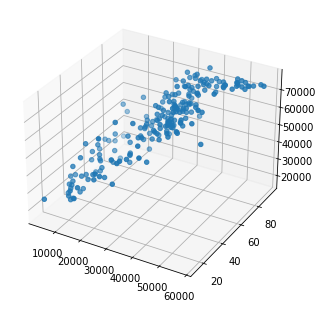

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs=df["Average Amount of Aid"], ys=df["Graduation Rate"], zs=df["Total Price"])
plt.savefig("./figs/linear_regression_visualization.png")
plt.show()

In [36]:
# TODO: implement Ridge, Lasso and Elastic-Net